In [24]:
import os

# 强制指定项目根目录
project_root = r'E:\AI\zhangzhou_.jpg'  # 使用原始字符串避免转义问题

# 构建图片路径
image_path = os.path.join(project_root)

# 验证路径
print(f"完整路径：{image_path}")
print(f"文件存在：{os.path.exists(image_path)}")

完整路径：E:\AI\zhangzhou_.jpg
文件存在：True


In [25]:
!pip install opencv-python matplotlib

In [26]:
import os
from pathlib import Path

# 方案1：绝对路径（推荐）
project_root = Path(r"E:\AI")
image_path = project_root  / "zhangzhou_.jpg"
# 验证
print(f"验证路径：{image_path}")
if image_path.exists():
    print("✅ 文件验证通过")
else:
    print("❌ 路径错误！请检查：")
    print(f"项目结构应为：")
    print(f"E:\\AI\\zhangzhou_.jpg")
    print(f"当前目录内容：{list(project_root.glob('*'))}")

验证路径：E:\AI\zhangzhou_.jpg
✅ 文件验证通过


🕵️ 正在尝试读取： E:\AI\zhangzhou_.jpg


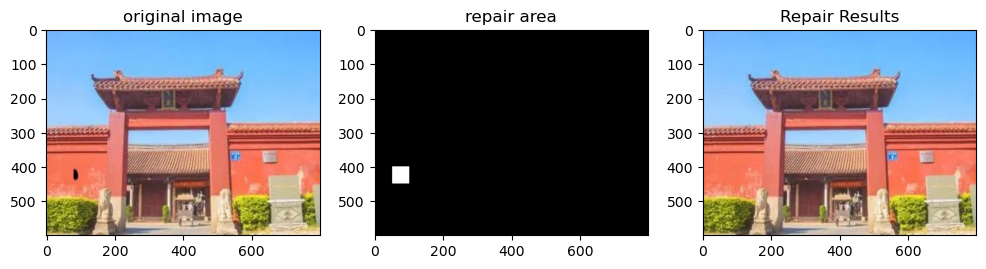

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import base64 
from IPython.display import display, HTML
# ===== 1. 安全读取图片 =====
def safe_read_image(file_name):
    # 获取绝对路径
    current_dir = os.getcwd()
    full_path = os.path.join(current_dir, file_name)
    print("🕵️ 正在尝试读取：", full_path)
    
    # 验证文件存在性
    if not os.path.exists(full_path):
        raise FileNotFoundError(f"文件 {file_name} 不存在！请检查路径和文件名")
    
    # 读取图片
    img = cv2.imread(full_path)
    if img is None:
        raise ValueError("OpenCV读取失败！可能原因：文件损坏或非图片格式")
    
    return img

# ===== 2. 主流程 =====
try:
    # 读取并预处理
    img = safe_read_image('E:\AI\zhangzhou_.jpg')
    img = cv2.resize(img, (800, 600))
    
    # 手动创建掩膜（示例：修复左上角区域）
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[400:450, 50:100] = 255  # 修改坐标范围匹配你的划痕位置
    
    # 修复图像
    restored = cv2.inpaint(img, mask, 10, cv2.INPAINT_NS)
    
    # 显示结果
    plt.figure(figsize=(12,6))
    plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('original image')
    plt.subplot(132), plt.imshow(mask, cmap='gray'), plt.title('repair area')
    plt.subplot(133), plt.imshow(cv2.cvtColor(restored, cv2.COLOR_BGR2RGB)), plt.title('Repair Results')
    plt.show()

except Exception as e:
    print("🔥 发生错误：", str(e))


    # ============= 添加 HTML 渲染部分 =============
    def display_image(title, image, is_mask=False):
        """将图像转换为 HTML 可显示的格式"""
        if is_mask or len(image.shape) == 2:  # 处理灰度图/掩码
            _, img_encoded = cv2.imencode('zhangzhou_.png', image)
        else:  # 处理彩色图
            # 转换为 RGB 格式
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            _, img_encoded = cv2.imencode('zhangzhou_.jpg', rgb_image)
        
        img_base64 = base64.b64encode(img_encoded).decode('utf-8')
        content_type = 'image/png' if is_mask else 'image/jpeg'
        
        display(HTML(f"<h3>{title}</h3><img src='data:{content_type};base64,{img_base64}'>"))
    
    # 显示所有图像
    display_image("原始图片 (HTML)", img)
    display_image("修复区域 (HTML)", mask, is_mask=True)
    display_image("修复结果 (HTML)", restored)

except Exception as e:
    print(f'● 发生错误: {str(e)}')